## Topics covered in this notebook:
1. What is Classification?.
2. Logistic Regression.
3. Optimal Weights.
    1. Closed form solution - Linear Discriminant Analysis(LDA).
    2. Cross-entropy function.
    3. Maximizing the likelihood.
    4. Gradient Descent.
4. L2 Regularization.
5. L1 Reguarization.
6. Advantages/Disadvantages.
7. References.

## 1. Classification Problem:

Consider a set of questions:
1. What digit is this? (MNIST data).
2. Is it a cat or a dog?
3. Will an online customer make a purchase?

What do all these problems in common?
1. Categorical **outputs**, called **labels** (Eg. Yes/No, Cat/Dog etc.).
2. Assigning each input vector to one of a finite number of labels is called **classification**.
3. **Binary classification** - Two possible labels. Simplest form of classification.
4. **Multi-class classification** - Multiple possible labels.

One such classifier is **Logistic Regression**.

**Example - Simple 2-dimenstional classification:**
Consider the following figure: <br>
1. There are 2 categories 'purple' & 'yellow'.
2. These 2 categories are separated by the blue decision line (x-y = 0).
3. Lets consider a point (2,1) indicated by red on the figure. How can we classify this?
    1. h(x,y) = x - y = 2 - 1 = 1 > 0 -> Hence 'yellow'.
4. Lets consider a point (1,2) indicated by black on the figure. How can we classify this?
    1. h(x,y) = x - y = 1 - 2 = -1 < 0 -> Hence 'purple'.
4. Lets consider a point (1,1) indicated by green on the figure. How can we classify this?
    1. h(x,y) = x - y = 1 - 1 = 0 -> Don't know.
<img src="Images/Ex-2D.png" alt="Drawing" style="width: 600px;"/>

From the above example to we formalize the variables in the following way:<br>
1. Call (x,y) -> (x1,x2).
2. Rename the constants to w.
3. Rename the bias/intercept term w0.
4. h(x) = w0 + w1x1 + w2x2. -> h is a **linear combination** of x.
5. Vector form: h(x) = wTx.
6. In 3-dimensions: line -> plane. >3 dimensions: hyperplane.


In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## 2. Logistic Regression:

Consider the schematic below from Simon Haykin's book on neural network:<br>
Schematic for logistic regression looks lot like a single neuron.There are inputs and weights associated with each input. Each inputs are then multiplied and goes through a summing junction. The output of the summing junction goes through some non-linear function.
<img src="Images/neuron.jpg" alt="Drawing" style="width: 400px;"/>
<br>
In the linear classification example above we looked at the sign of the output to classify each points. But in logistic regression we replace it with **sigmoid** or **logistic** function. <br>

what does sigmond function look like?<br>
1. In general: S - shaped curve.
2. Finite limit as x approaches infinitiy & negative infinity.
3. There are few variations of sigmoid function: 
    1. Hyperbolic tangent - tanh(x) E (-1,1) & y-intercept is 0.
    2. Binary sigmoid:
    \begin{align}
    \large \sigma(z)\, &= \large \frac{1}{1\,+\,exp(-z)}\,  \epsilon \,(0,1)\,,\,y-intercept\,is\,0.5.\\ 
    \end{align}   
<img src="Images/sigmoid.png" alt="Drawing" style="width: 500px;"/>
<br>

#### Output of a logistic regression:
\begin{align}
\large \sigma(w^Tx)\, &= \large \frac{1}{1\,+\,exp(-w^Tx)}\,\\ 
\end{align}   
1. If the inner product of w.dot(x) is positive we get a number close to +1.
2. If the inner product of w.dot(x) is negative we get a number close to 0.
3. If the inner product of w.dot(x) is zero we get 0.5.

So based on this we classify anything above 0.5 as class 1 and below 0.5 is class 0. This process of going from inputs to getting output from a sigmoid function is called **feedforward** process.

## 3. Optimal Weights:

### Special case of logistic regression:
In this case we can find a closed form solution. In general we cannot and we will have to use gradient descent.<br>
1. Consider 2 Gaussian clouds.
2. Both have the same covariance but differnt mean.
3. Mulivariate Gaussian PDF:
\begin{align}
\large p(x)\, &= \large \frac{1}{(2 \pi)^D \lvert \large \Sigma \rvert}\, e^{-\frac {1}{2}(x-\mu)^T \Sigma^-1 (x-\mu)}\\ 
\end{align}   

To be continued


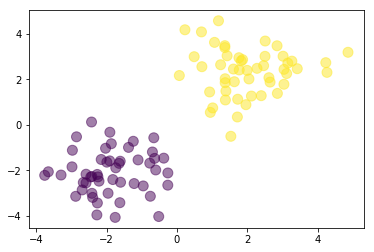

In [7]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

N = 100 # Number of samples
D = 2 # Number of features

X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

# To be continued
print('To be continued')

### 3.A Closed Form Solution or LDA:
1. Lets look at **Bayes' Rule**:
\begin{align}
\large p(Y\,|\,X)\, &= \large \frac {p(X\,|\,Y)\,p(Y)}{p(X)}\\ 
\end{align} 
Example:
\begin{align}
\large p(Y=1\,|\,X)\, &= \large \frac {p(X\,|\,Y=1)\,p(Y=1)}{p(X)}\\ 
\large p(Y=0\,|\,X)\, &= \large \frac {p(X\,|\,Y=0)\,p(Y=0)}{p(X)}\\ 
\end{align} 
where:<br>
    1. p(X | Y) is the Gaussian - Calculate it over all the data from the class Y.
    2. p(Y) is the frequencey estimate of Y. # class 1 appeared/ # total.
    <br>
    <br>
2. Manipulate Bayes' Rule & put it into logistic regression framework:
<br>
<br>
\begin{align}
\large p(y=1\,|\,x)\, &= \large \frac {p(x\,|\,y=1)\,p(y=1)}{p(x)} = \large \frac {p(x\,|\,y=1)\,p(y=1)}{p(x\,|\,y=1)p(y=1)\,+\, p(x\,|\,y=0)p(y=0)} \\ 
\end{align} 
<br>
<br>
3. Divide top & bottom by p(x|y=1)p(y=1):
<br>
<br>
\begin{align}
\large p(y=1\,|\,x)\, = \large \frac {1}{1\,+\, \frac {p(x\,|\,y=0)p(y=0)}{p(x\,|\,y=1)p(y=1)}} \\ 
\end{align} 
<br>
<br>
Looks a lot like **logistic regression sigmoid**.
<br>
<br>
\begin{align}
\large p(y=1\,|\,x)\, = \large \frac {1}{1\,+\, \large \frac {p(x\,|\,y=0)p(y=0)}{p(x\,|\,y=1)p(y=1)}} = \large \frac{1}{1\,+\,exp(-w^Tx)}\,\\ 
\end{align} 
<br>
<br>
4. From the comparison above, we can write:
<br>
<br>
\begin{align}
\large (-w^Tx) = \large ln \left(\frac {p(x\,|\,y=0)p(y=0)}{p(x\,|\,y=1)p(y=1)}\right) \,\\ 
\end{align} 
<br>
<br>
5. Let p(y=1) = 1 - $\alpha$ & p(y=0) = $\alpha$
<br>
<br>
\begin{align}
ln \left(\frac {p(x\,|\,y=0)p(y=0)}{p(x\,|\,y=1)p(y=1)}\right)\,&=\, ln(p(x\,|\,y=0)) \,+\, ln \alpha - ln\, p(x\,|\,y=1)\,-\,ln (1- \alpha)\\ 
&=  \frac{1}{(2 \pi)^D \lvert  \Sigma \rvert}\, e^{-\frac {1}{2}(x-\mu_0)^T \Sigma^-1 (x-\mu_0)} -
    \frac{1}{(2 \pi)^D \lvert  \Sigma \rvert}\, e^{-\frac {1}{2}(x-\mu_1)^T \Sigma^-1 (x-\mu_1)} +
    ln \frac {\alpha}{1-\alpha}\\
&= - \frac {1}{2} (x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_0 - \mu_0^T\Sigma^{-1}x + \mu_0^T\Sigma^{-1}\mu_0) + 
     \frac {1}{2} (x^T\Sigma^{-1}x - x^T\Sigma^{-1}\mu_1 - \mu_1^T\Sigma^{-1}x + \mu_1^T\Sigma^{-1}\mu_1) +
     ln \frac {\alpha}{1-\alpha}\\
&= \mu_0^T\Sigma^{-1}x - \mu_1^T\Sigma^{-1}x - \frac {1}{2} \mu_0^T\Sigma^{-1}\mu_0 + \mu_1^T\Sigma^{-1}\mu_1 + ln \frac{\alpha}    {1-\alpha}\\
&= (\mu_0^T \,-\, \mu_1^T)\Sigma^-1x - \frac {1}{2} \mu_0^T\Sigma^{-1}\mu_0 + \mu_1^T\Sigma^{-1}\mu_1 + ln \frac{\alpha}{1-        \alpha} \\
& = -(w^Tx + b)
\end{align} 
<br>
<br>
where,
<br>
<br>
\begin{align}
\large w^T &= \large (\mu_1^T \,-\, \mu_0^T)\Sigma^{-1}x \\
\large b &=  \large \frac {1}{2} \mu_0^T\Sigma^{-1}\mu_0 - \mu_1^T\Sigma^{-1}\mu_1-+ ln \frac{\alpha}{1-\alpha} \\
\end{align} 
<br>
<br>
Comments on the math above:
    1. 1/sqrt term cancels out.
    2. Quadratic terms cancels out.
    3. Covariance & Inverse are symmetric.


This method is also called as **Linear Discriminant Analysis (LDA)**.
<br>
<br>
Final Comments:
1. If covariance is diagonal matrix -> It is an instance of Naive Bayes.
2. If we have differenct covariances, it is called Quadratic Discriminant Analysis(QDA) as the quadratic term won't cancel out.
3. Above solution is valid only for special cases like this.

For the example above, if we calculate weights we get (4,4) & bias is 0.

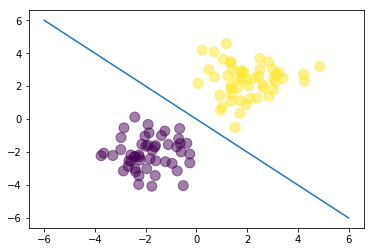

In [8]:
# Continuing from the above example:
# add a column of ones

ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# closed-form solution from the calculation above.
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

### 3.B Cross-Entropy Function:
1. In linear regression we used squared error as the cost function. Assumption here is Gaussian-distributed error.
2. Logistic error can't be Gaussian distributed because:
    1. Target is only 0/1.
    2. Output is only a number between 0-1.
3. We want 0:if correct, >0 if not correct, more wrong == bigger cost. This accomplished by using **cross-entropy error fucntion**.
<br>
<br>
\begin{align}
\large J \,=\, - [tlog(y) \,+\, (1-t)log(1-y)]\\
\end{align}
<br>
<br>
    1. For each input only one term matters. Because if t = 1 only 1st term matters & vice-versa.
    2. Also log(y) is always between 0 and $-\infty $. Hence the negative sign in the cost function.
    3. Example:
        1. t = 1, y = 1 -> 0.
        2. t = 0, y = 0 -> 0.
        3. t = 1, y = 0.9 -> 0.11.
        4. t = 1, y = 0.5 -> 0.69.
        5. t = 1, y = 0.1 -> 2.3. -> Notice how the error increase.
4. For multiple training samples -> we sum all the error:
<br>
<br>
\begin{align}
\large J \,=\, - \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n)\\
\end{align}
<br>
<br>

### 3.C Maximizing the Likelihood:
Consider a coin toss example:<br>
p(H) = p<br>
p(T) = 1-p<br>
N = 10 -> 7H & 3T<br>
Likelihood = p^7 (1-p)^3<br>
Maximize Likelihood: Take derivative & set it to zero. We get p=0.7 that maximizes L. Notice this is same as p(H).<br>

Apply this to Logistic Regression:<br>
\begin{align}
\large p(y=1 \,|\, x) \,&=\, \large \sigma(w^TX) =\large y \\
\large L \,&=\, \large \prod_{n=1}^N\, y_n^{t_n} (1-y)^{t_n} \\
\end{align}
<br>
<br>
This works because if the target is 1 p = y else p = 1-y.
Take log likelihood:
<br>
<br>
\begin{align}
\large l \,=\, \large \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n)\\
\end{align}
<br>
<br>
We get the same form as **Cross-Entropy** function. They are just negatives of each other. So maximizing the log-likelihood is same as minimizing the cross-enropy function.

### 3.D Gradient Descent:
If we assume the date is Gaussian-distributed with equal covariance, we can use the Bayes' method. But generally that is not the case. This is when gradient descent is very useful as it is more general.
<br>
<br>
\begin{align}
\large J \,=\, \large \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n)\\
\end{align}
<br>
<br>
Split into 3 derivatives:
<br>
<br>
\begin{align}
\large \frac {\partial J}{\partial w_i} \,&=\, \large \Sigma_{n=1}^N\, \frac {\partial J}{\partial y_n}
                                                                      \frac {\partial y_n}{\partial a_n}
                                                                      \frac {\partial a_n}{\partial w_i}\\
\large a_n &= \large w^Tx_n\\                                                                   
\end{align}
<br>
<br>
\begin{align}
\large \frac {\partial J}{\partial y_n} \,&=\, - \large \Sigma_{n=1}^N\, t_n \frac {1}{y_n} \,+\, (1-t_n) \frac {1}{1-y_n}(-1)\\ 
\end{align}
<br>
<br>
Calculate derivative of y w.r.t a:
<br>
<br>
\begin{align}
\large y_n \,&=\, \large \sigma(a_n) \,=\, \frac {1}{1+e^{-a_n}}\\
\large \frac {\partial y_n}{\partial a_n} \,&=\, \large \frac {-1}{(1+e^{-a_n})^2}(e^{-a_n})(-1)\\ 
                                           \,&=\, \large \frac {e^{-a_n}}{(1+e^{-a_n})^2}\\ 
                                           \,&=\, \large \frac {1}{(1+e^{-a_n})} \,\, \frac {e^{-a_n}}{(1+e^{-a_n})}\\ 
                                           \,&=\, \large y_n(1-y_n)\\ 
\end{align}
<br>
<br>
Calculate derivative of a w.r.t to w:
<br>
<br>
\begin{align}
\large a_n \,&=\, \large w^Tx_n\\
\large a_n \,&=\, \large w_0x_{n0} \,+\, w_1x_{n1} \,+\, ....\\
\large \frac {\partial a_n}{\partial w_i} \,&=\, \large x_{ni}
\end{align}
<br>
<br>
Put this all together:
<br>
<br>
\begin{align}
\large \frac {\partial J}{\partial w_i} \,&=\, - \large \Sigma_{n=1}^N\, t_n \frac {1}{y_n} y_n(1-y_n) x_{ni} \,-\,                                                              \frac {(1-t_n) }{1-y_n}
                                                 \large y_n(1-y_n) 
                                                 \large x_{ni}\\ 
                                          &=\, - \large \Sigma_{n=1}^N\, t_n (1-y_n) x_{ni} \,-\,(1-t_n)
                                                 \large y_n 
                                                 \large x_{ni}\\ 
                                           &=\   \large \Sigma_{n=1}^N\, (y_n \,-\, t_n)x_{ni}
\end{align}
<br>
<br>
If we vectorize:
<br>
<br>
\begin{align}
\large \frac {\partial J}{\partial w} \,&=\   \large \Sigma_{n=1}^N\, (y_n \,-\, t_n)x_{n}\\
\end{align}
<br>
<br>
Vectorize More:
<br>
<br>
\begin{align}
\large \frac {\partial J}{\partial w} \,&=\   \large X^T(Y-T)\\
\end{align}
<br>
<br>
Bias Term:
<br>
<br>
\begin{align}
\large \frac {\partial J}{\partial w_0} \,&=\   \large \Sigma_{n=1}^N\, (y_n \,-\, t_n)x_{n0} = \large \Sigma_{n=1}^N\, (y_n \,-\, t_n) \\
\end{align}

## 4. L2 Regularization:

Consider the example from section 3A - Closed form solution. From there,
1. We found the exact Bayesian solution was w = [0,4,4]
2. This represents a line 0 + 4x + 4y = 0 -> y = -x.
3. Slop of -1 & y-intercept: 0.
4. Why is solution (4,4)? Why not (1,1) or (10,10)? -> All these represent the same line.
    1. If you look at (0,4,4): y = 0.99966; J = -0.000335.
    2. If you look at (0,1,1): J = -0.12.
    3. If you look at (0,10,10): J = -2.06e-09.
    4. This explains why (0,4,4) was chosen. Also ideally we would want (0,inf, inf) for the cost to be 0.
5. Because of this logistic regression would still to go to w = (0,inf, inf).
6. We need regularization that penalizes large weights.
<br>
<br>
\begin{align}
\large J \,&=\, \large \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n)\\
\large J_{reg} \,&=\, \large J + \left(\frac {\lambda}{2}\right)\lvert\lvert \large w^2\rvert\rvert\\
\end{align}
<br>
<br>
7. Now we won't try yo go to (0,10,10).
8. $\large \lambda$ - Smoothing parameter (~0.1,1).

### Solving for w:
1. Use gradient descent.
2. But we have to calculate the gradien for $\large \frac {\partial J_{reg}}{\partial w_{i}}$.
3. $\large \frac {\partial J_{reg}}{\partial w_{i}} = \large \frac {\partial J}{\partial w_{i}} + \large \frac {\partial reg-cost}{\partial w_{i}}$.
4. $\large \frac {\partial reg-cost}{\partial w_{i}} = \large \lambda w_i$.
5. In vector form: $\large \frac {\partial reg-cost}{\partial w} = \large \lambda w$.
6. Full form:
<br>
\begin{align}
\large \frac {\partial J_{reg}}{\partial w_{i}} = \large X^T(Y-T) + \lambda w
\end{align}
<br>
<br>

### Probabilistic Perspective:

1. Cross-entropy maximizes the likelihood, since J = -log(likelihood).
2. Definition of J with regularization:
<br>
\begin{align}
\large J \,&=\,  \large \, tlog(y) \,+\, (1-t)log(1-y) - \left(\frac {\lambda}{2}\right)\lvert\lvert \large w^2\rvert\rvert\\
\end{align}
<br>
3. Take exponent on both sides:
<br>
\begin{align}
\large e^{J} \,&=\, \large y^t(1-y)^{1-t}+ e^{\left(-\frac {\lambda}{2}\right)\lvert\lvert \large w^2\rvert\rvert}\\
\end{align}
<br>
4. Expoentiate the first part: Bernoulli(likelihood) t ~ Bernoulli(y).
5. Expoentiate the 2nd part: Gaussian(prior) w ~ N(0,1/$ \lambda$).
6. **Posterior $\propto$ Likelihood * Prior **.
7. Our 'prior belief' about w is that its Gaussian distributed with variance $\frac {1}{\large \lambda}$.
8. Without regulariztion we are maximizing the likelihood.
9. With regularization we are **maximizing the posterior or MAP**.

## 5. L1 Regularization
In general we want no. of features(D) << no. of samples(N). Also, there might be a case where some of the features are just constant or quasi-const, uncorrelated to output etc. In all these cases we could use L1 regularization to eliminate those features from the model.

1. Select a small number of important features that actually predict the trend.
2. Eliminate the noise influence on the output.
3. Similar to L2. It has a penalty term using L1 norm.
<br>
<br>
\begin{align}
\large J_{RIDGE} \,&=\, \large \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n) + \left(\frac {\lambda}{2}\right)\lvert\lvert \large w^2\rvert\rvert\\
\large J_{LASSO} \,&=\, \large \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n) + \left(\frac {\lambda}{2}\right)\lvert\lvert \large w\rvert\rvert\\
\end{align}
<br>
<br>
4. Similar to L2 this also puts a prior on w, so its also a MAP estimation of w. We had a gaussian distribution on the prior for L2. We have Laplace here:
\begin{align}
\large p(w) \, &= \large \frac {\lambda}{2} exp(- \lambda \lvert \large w\rvert) \\
\end{align}
<br>
<br>
5. Taking derivative of cost function:
\begin{align}
\large J \,&=\, \large \Sigma_{n=1}^N\, t_nlog(y_n) \,+\, (1-t_n)log(1-y_n) + \lvert\lvert \large w\rvert\rvert\\
\\
\large \frac {\partial J_{reg}}{\partial w_{i}} &= \large X^T(Y-T) + \lambda sign(w)\\
\end{align}
<br>
<br>
6. Use gradient descent and continue the same way.

## 6. Advantages & Disadvantages:
### Advantages:
1. Easily extended to mutiple classes.
2. Natural probabilistic view of class prerdictions.
3. Quick to train.
4. Fast at classification.
5. Good accuracy for many simple data sets.
6. Ressitant to overfitting.
7. Can interpret model coefficients as indicators of feature importance.

### Less good:
1. Linear decision boundary. Too simple for complex problems.
2. Only binary classification.

## 7. References:
1. An Introduction to Statistical Learning Textbook by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.
2. University of Michigan EECS 445 - Machine Learning Course (https://github.com/eecs445-f16/umich-eecs445-f16).<br>
3. University of Toronto CSC 411 - Intro. to Machine Learning (http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/CSC411_Fall16.html).<br>
4. Stanford CS109 - Intro. to proabability for computer scientists (https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/). <br>
5. Few online courses on Udemy, Coursera etc.